In [1]:
# fundamentals
import os, sys
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import scipy.stats as stats
import datetime
import imp
import scipy.io as sio
import pickle as pkl

# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rc('font', size=12)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis as vis
import utils as utils


# # to read .mat files
# import h5py

In [13]:
datapath = '/Users/nhamilto/Documents/Wake_Dynamics/SiteChar/data/IEC/'

# begin empty lists for events
Ve01events = []
Ve50events = []
EOGevents = []
ETMevents = []
EDCevents = []
ECDevents = []
EWSevents = []
        
fPaths = os.listdir(datapath)


In [14]:
# load list of IEC extreme event times of occurence
for ifile, file in enumerate(fPaths):
    loadfile = os.path.join(datapath,file)
    with open(loadfile, 'rb') as f:
        test= pkl.load(f)
    if ifile==0:
        events = test
    else:
        for key in test:
            events[key].extend(test[key])

# Make a dataframe out of dictionaries
for ikey,key in enumerate(events.keys()):
    print(key+':', len(events[key]))
    temp = pd.DataFrame(data = np.ones(len(events[key])), index=events[key],columns=[key])
    if ikey==0:
        eventsdf = temp
    else:
        eventsdf = eventsdf.merge(temp, right_index=True, left_index=True, how='outer')

# resample to 10 minute intervals
downsamp = eventsdf.resample('10T').count()


EWS_Ve01: 0
EWS_Ve50: 0
EOG: 295662
ETM: 1472
EDC: 346298
ECD: 593
EWS: 1336929


# load trimmed data, concatenate into a single dataframe

In [4]:
datapath = '../../data/trimdat/'
fPaths = os.listdir(datapath)

for ifile, file in enumerate(fPaths):
    loadfile = os.path.join(datapath,file)
    
    temp = pd.read_csv(loadfile)
    
    if ifile==0:
        metdat = temp
    else:
        metdat = metdat.append(temp)

# Reindex with date
metdat.set_index('Date', inplace=True)
metdat.index = pd.to_datetime(metdat.index)
catinfo = MET.get_catinfo(metdat)

/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (137,138,139,142) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/nhamilto/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


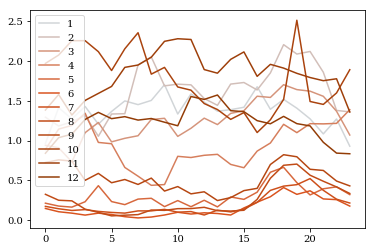

In [6]:
test = eventsdf.groupby([eventsdf.index.month, eventsdf.index.hour]).mean()
temp = test['EOG'].unstack().transpose()
colors = utils.get_colors(12, basecolor='red')
# colors = colors[6:]+colors[0:5]
temp.plot(colors=colors)
monthnames = utils.monthnames()

In [17]:
downsamp.describe()

,EWS_Ve01,EWS_Ve50,EOG,ETM,EDC,ECD,EWS
count,299291.0,299291.0,299291.000000,299291.000000,299291.000000,299291.000000,299291.000000
mean,0.0,0.0,0.987875,0.004918,1.157061,0.001981,4.466987
std,0.0,0.0,3.796521,0.069958,4.120686,0.068096,9.847508
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000
max,0.0,0.0,58.000000,1.000000,63.000000,6.000000,49.000000


In [15]:
eventsdf.describe()

,EWS_Ve01,EWS_Ve50,EOG,ETM,EDC,ECD,EWS
count,0.0,0.0,295662.0,1472.0,346298.0,593.0,1336929.0
mean,NaN,NaN,1.0,1.0,1.0,1.0,1.0
std,NaN,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,1.0,1.0,1.0,1.0,1.0
25%,NaN,NaN,1.0,1.0,1.0,1.0,1.0
50%,NaN,NaN,1.0,1.0,1.0,1.0,1.0
75%,NaN,NaN,1.0,1.0,1.0,1.0,1.0
max,NaN,NaN,1.0,1.0,1.0,1.0,1.0


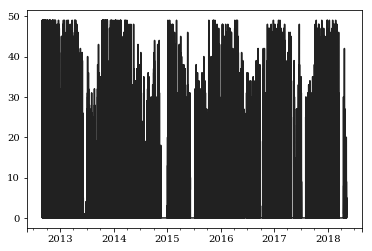

In [18]:
downsamp['EWS'].plot()

# get metdat that corresponds to times of a particular event

In [42]:
ECD = metdat.merge(downsamp[downsamp['ECD'] > 1],right_index=True, left_index=True)
EWS = metdat.merge(downsamp[downsamp['EWS'] > 1],right_index=True, left_index=True)


(array([6.16282841e-03, 3.80294836e-02, 7.33052222e-02, 9.85721567e-02,
        1.08898701e-01, 1.06979023e-01, 9.84993414e-02, 8.52866609e-02,
        7.26366447e-02, 6.12575877e-02, 5.03617600e-02, 4.28816353e-02,
        3.37863332e-02, 2.77029398e-02, 2.17386987e-02, 1.68666883e-02,
        1.36760510e-02, 1.07369578e-02, 8.26785466e-03, 6.01719767e-03,
        4.94482581e-03, 3.81287773e-03, 2.44262480e-03, 2.01897171e-03,
        1.33053546e-03, 1.09885018e-03, 8.14208265e-04, 5.36185931e-04,
        3.77316025e-04, 3.04500652e-04, 2.05206961e-04, 2.05206961e-04,
        8.60545321e-05, 1.25772008e-04, 3.30978970e-05]),
 array([ 0.985425  ,  3.49607569,  6.00672637,  8.51737706, 11.02802774,
        13.53867843, 16.04932911, 18.5599798 , 21.07063049, 23.58128117,
        26.09193186, 28.60258254, 31.11323323, 33.62388391, 36.1345346 ,
        38.64518529, 41.15583597, 43.66648666, 46.17713734, 48.68778803,
        51.19843871, 53.7090894 , 56.21974009, 58.73039077, 61.24104146,
 

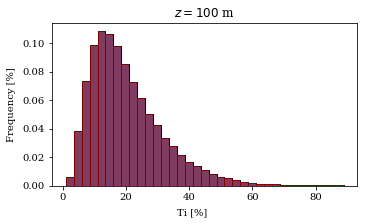

In [122]:
fig,ax = vis.hist(metdat, catinfo, 'ti', vertloc=100)
dat = metdat['Cup Equivalent Ti (sonic_100m)'].dropna()
ax.hist(dat, 35, color = 'r', alpha=0.5,weights = np.ones(len(dat))/len(dat))

In [110]:
catinfo['columns']['ti']

['Ti (cup_ 10 m)',
 'Ti (cup_ 105 m)',
 'Ti (cup_ 122 m)',
 'Ti (cup_ 130 m)',
 'Ti (cup_ 3 m)',
 'Ti (cup_ 30 m)',
 'Ti (cup_ 38 m)',
 'Ti (cup_ 55 m)',
 'Ti (cup_ 80 m)',
 'Ti (cup_ 87 m)',
 'Cup Equivalent Ti (sonic_100m)',
 'Cup Equivalent Ti (sonic_119m)',
 'Cup Equivalent Ti (sonic_15m)',
 'Cup Equivalent Ti (sonic_41m)',
 'Cup Equivalent Ti (sonic_61m)',
 'Cup Equivalent Ti (sonic_74m)']

In [14]:
varcol,_,_ = utils.get_vertical_locations(catinfo['columns']['speed'], location=80)

In [15]:
varcol

'Speed (cup_ 80 m)'

In [16]:
temp = metdat.groupby(metdat.index.month).mean()
temp[varcol]

Date
1     5.884221
2     6.152947
3     5.765251
4     5.061186
5     4.161634
6     4.275314
7     4.499524
8     4.226610
9     4.233839
10    4.857234
11    5.131529
12    5.842846
Name: Speed (cup_ 80 m), dtype: float64

In [9]:
temp = metdat[metdat[varcol] == metdat[varcol].max()]

In [10]:
temp[varcol]

Date
2017-02-04 08:00:00    27.769061
Name: Speed (sonic_100m), dtype: float64

In [20]:
temp = metdat.groupby(metdat.index.month).mean()

In [35]:
for col in catinfo['columns']['wind shear']:
    shear = temp[col]
    print(shear.mean(), col)

nan Wind Shear (10_ 87 m)
nan Wind Shear (130_ 105_ 80_ 55_ 30 m)
0.07931894049381434 Wind Shear (38_ 122 m)
nan Wind Shear (38_ 87 m)
nan Wind Shear (3_ 122 m)
nan Wind Shear (3_ 87 m)
nan Wind Shear (87_ 38_ 10_ 3 m)


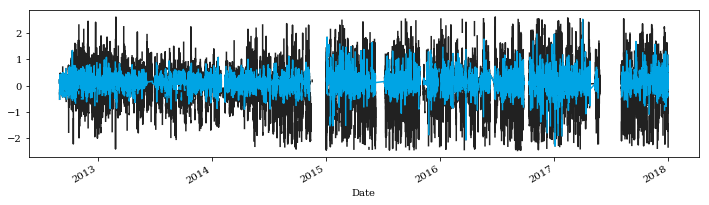

In [47]:
fig, ax = plt.subplots(figsize=(12,3))
ms = metdat['Wind Shear (38_ 122 m)'].plot(ax=ax)
ews = EWS['Wind Shear (38_ 122 m)'].plot(ax=ax, color='C1')

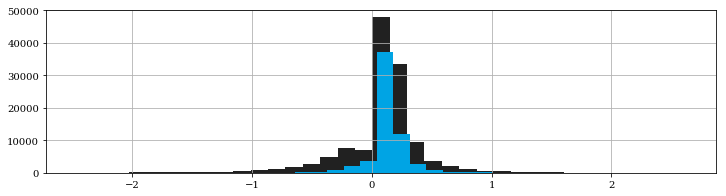

In [48]:
fig, ax = plt.subplots(figsize=(12,3))
ms = metdat['Wind Shear (38_ 122 m)'].hist(bins=35,ax=ax)
ews = EWS['Wind Shear (38_ 122 m)'].hist(ax=ax, bins=35, color='C1')